Nome/Matrícula:

Thales Henrique Silva / 2020007040

Leandro Diniz Silva / 2019105718

Rodrigo Ferreira Araújo / 2020006990

Hélio Martíns de Araújo Costa Neto / 2017068750

Link do vídeo: https://www.youtube.com/watch?v=pVsKMdK-41A

In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold,KFold, train_test_split
import warnings
from sklearn import preprocessing
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)


# Introdução

Iremos analisar informações sobre os jogadores do jogo Fifa 19. Daremos atenção à pergunta de como determinar o salário de um jogador com base em certas características.



In [320]:
data = pd.read_csv('https://raw.githubusercontent.com/leandrodinizsilva/tp-icd/main/data.csv', sep=',', header=0)
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#Metodologia


**Fifa 19 - Descrição:**  

A base original apresenta várias colunas contendo informações dos jogadores cadastrados no Fifa 19, tais como time, idade, salário, altura, etc. 

Fonte: https://www.kaggle.com/karangadiya/fifa19


## Processamento de dados

Foi necessário remover colunas com dados irrelevantes e converter algumas para tipo numérico, visando facilitar o nosso objeto de estudo.

In [321]:
#retirando colunas irrelavantes
data.drop(['Unnamed: 0','ID','Photo', 'Flag', 'Club Logo', 'Loaned From'], axis=1, inplace=True)
cols = [i for i in range(22,49)]
data.drop(data.columns[cols], axis = 1, inplace=True)

#arrumando a altura e o peso
pd.options.display.max_columns = 90
data['Weight'] =  data['Weight'].str[:3].astype(float) /  2.205
data['Height(cm)'] = data['Height'].str.split("'") 
data['Height'] = (12 * data['Height(cm)'].str[0].astype(float) + data['Height(cm)'].str[1].astype(float)) * 2.54
data.drop(['Height(cm)'], axis=1, inplace=True)
data.rename({'Height': 'Height (cm)', 'Weight': 'Weight (kg)'},axis=1, inplace=True)


In [322]:
#arrumando o valor, salário e cláusula de quebra
s = pd.Series(['Value','Wage','Release Clause'])
for i in s:
  data['aux1'] = data[i].str.extract('(€\d+)')
  data['aux1'] = data['aux1'].str.extract('(\d+)')
  data['aux1'] = data['aux1'].astype(float)
  data['aux2'] = data[i].str.extract('(\.\d+)')
  data['aux2'].fillna(0, inplace=True)
  data['aux2'] = data['aux2'].astype(float)
  data[i] = data['aux1'] + data['aux2']
  data.drop(['aux1', 'aux2'],axis=1,inplace=True)

In [323]:
#Arrumando os tipos corporais
data.loc[data['Body Type'] == 'Akinfenwa', 'Body Type'] = 'Stocky'
data.loc[data['Body Type'] == 'Neymar', 'Body Type'] = 'Lean'
data.loc[data['Body Type'] == 'Messi', 'Body Type'] = 'Lean'
data.loc[data['Body Type'] == 'C. Ronaldo', 'Body Type'] = 'Stocky'
data.loc[data['Body Type'] == 'Shaqiri', 'Body Type'] = 'Stocky'
data.loc[data['Body Type'] == 'Courtois', 'Body Type'] = 'Normal'
data.loc[data['Body Type'] == 'PLAYER_BODY_TYPE_25', 'Body Type'] = 'Normal'

#Agora só há três tipos
set(data['Body Type'])

{'Lean', 'Normal', 'Stocky', nan}

In [324]:
#tamanho normal
data.shape

(18207, 56)

In [325]:
#tamanho depois de remover os nulos (diferença de ~1500)
data = data.dropna()
data.shape

(16643, 56)

A base de dados após o processamento possui 16643 linhas e 56 colunas.

# Análise Exploratória de Dados

In [326]:
#A "cara" do dataset:
display(data.head())

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height (cm),Weight (kg),Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Lean,Yes,RF,10.0,"Jul 1, 2004",2021,170.18,72.108844,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405.0,2228,Right,5.0,4.0,5.0,High/ Low,Stocky,Yes,ST,7.0,"Jul 10, 2018",2022,187.96,82.993197,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290.0,2143,Right,5.0,5.0,5.0,High/ Medium,Lean,Yes,LW,10.0,"Aug 3, 2017",2022,175.26,68.027211,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,De Gea,27,Spain,91,93,Manchester United,72.0,260.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",2020,193.04,76.190476,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,355.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",2023,180.34,69.841270,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [327]:
#função para plotar
def plotar(coluna1, coluna2, titulo, tipo):
  if tipo == 'count':
    attribute = data.groupby([coluna1], as_index = False).count()
  
  if tipo == 'mean':
    attribute = data.groupby([coluna1], as_index = False).mean()
  
  if tipo == 'median':
    attribute = data.groupby([coluna1], as_index = False).median()  

  attribute = pd.DataFrame(attribute[[coluna1, coluna2]]).sort_values(by = coluna2, ascending = False)
  attribute = attribute[:10]
  _ = attribute.plot.bar(x = coluna1, title = titulo, figsize = (7,7), legend = False)

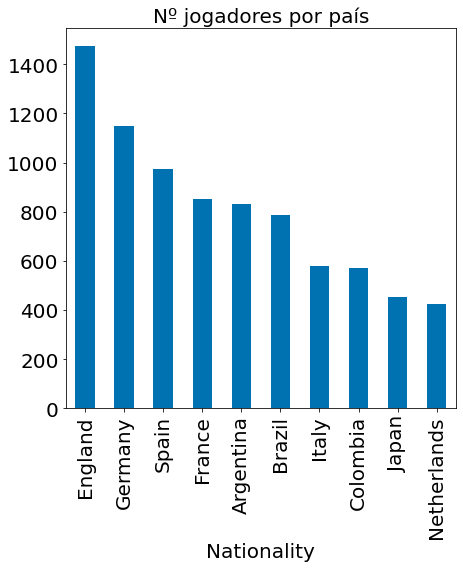

In [328]:
plotar('Nationality', 'Name', 'Nº jogadores por país', 'count')

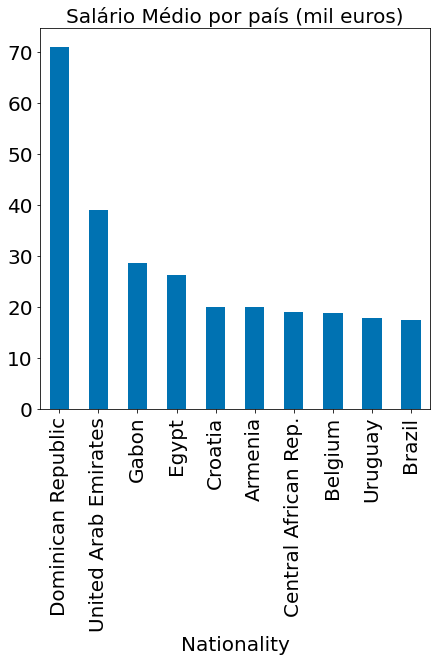

In [329]:
plotar('Nationality', 'Wage', 'Salário Médio por país (mil euros)', 'mean')

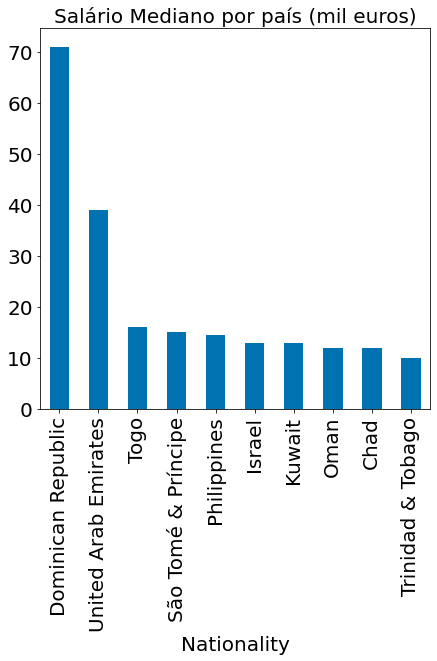

In [330]:
plotar('Nationality', 'Wage', 'Salário Mediano por país (mil euros)', 'median')

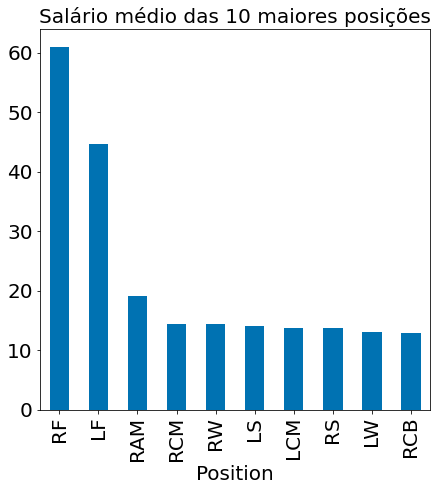

In [331]:
plotar('Position', 'Wage', 'Salário médio das 10 maiores posições', 'mean')

Inserimos alguns gráficos relacionando o salário com algum atributo.

## Hipótese I



Hipótese

Se um jogador brasileiro ganha mais que um jogador argentino e se isso é causado aleatoriamente ("hipótese nula") ou por um outro motivo ("hipótese alternativa").

*μBrasileiro != μArgentino*


Diferença observada:  5.996279730166178


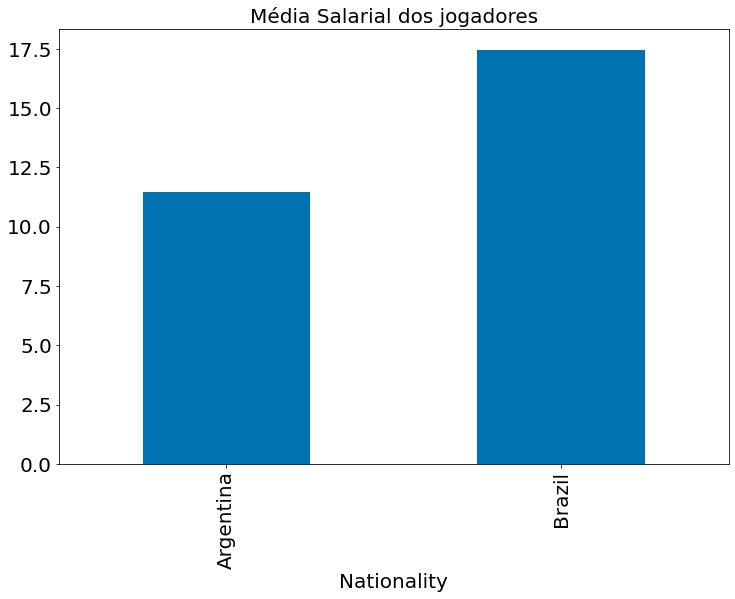

In [332]:
#data = pd.read_csv('fifa.csv', index_col='ID')
brasilArgentina = data.loc[(data['Nationality'] == 'Brazil') | (data['Nationality'] == 'Argentina')].sort_values('Wage', ascending = False)
t_obs = brasilArgentina[brasilArgentina['Nationality'] == 'Brazil']['Wage'].mean() - brasilArgentina[brasilArgentina['Nationality'] != 'Brazil']['Wage'].mean()
print("Diferença observada: ", t_obs)
meanPlot = brasilArgentina[['Nationality','Wage']].groupby("Nationality").agg([np.mean])
_ = meanPlot.plot(kind = "bar", y = "Wage", legend = False,
            title = "Média Salarial dos jogadores")

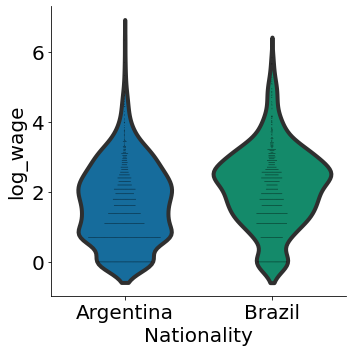

In [333]:
brasilArgentina['log_wage'] = np.log(brasilArgentina['Wage'])
g = sns.catplot(x="Nationality", y="log_wage", kind="violin", inner=None, data=brasilArgentina)
_ = sns.swarmplot(x="Nationality", y="log_wage", color="k", size=0.5, data=brasilArgentina, ax=g.ax)

Pelo violin plot é possível perceber que existem menos jogadores brasileiro que recebem "pouco" comparado aos jogadores argentinos, onde no centro do "violiono" brasileiro é possivel reparar que ele é mais "aberto", representando uma quantidade maior de jogadores com salario "médio".

Para testar a hipótese utilizamos o bootstrap, que consiste em tirar amostras a fim de simular o "mundo aleatório".

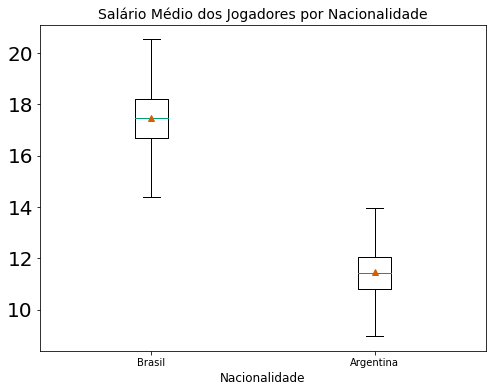

Intervalo de confiança:  3.066616824394732 ,  8.94910744754754
Valores extremos (Brasil):  15.407328680203046 ,  19.863007614213195
Valores extremos (Argentina):  9.824699879951982 ,  13.522298919567826
P-Valor:  0.4996


In [334]:
def bootstrap_mean(df1, df2, column, n=5000):
    size1 = len(df1)
    size2 = len(df2)
    values1 = np.zeros(n)
    values2 = np.zeros(n)
    values_diff = np.zeros(n)
    for i in range(n):
        sample1 = df1[column].sample(size1, replace=True, random_state=i)
        sample2 = df2[column].sample(size2, replace=True, random_state=i*3)
        values1[i] = sample1.mean()
        values2[i] = sample2.mean()
        values_diff[i] = sample1.mean() - sample2.mean()
    return values1, values2, values_diff

brasil = brasilArgentina[brasilArgentina['Nationality']=='Brazil']
argentina = brasilArgentina[brasilArgentina['Nationality']=='Argentina']
col = 'Wage'
v_brasil, v_argentina, v_diff = bootstrap_mean(brasil, argentina, col)

bp_data = [v_brasil, v_argentina]
plt.rcParams['figure.figsize']  = (8, 6)
plt.boxplot(bp_data,  positions=[1,2], showfliers=False, showmeans=True)
plt.xticks([1,2], ['Brasil', 'Argentina'], fontsize=10)
plt.ylabel('', fontsize=13)
plt.xlabel('Nacionalidade', fontsize=12)
plt.title('Salário Médio dos Jogadores por Nacionalidade', fontsize=14)
plt.show()


print("Intervalo de confiança: ", np.percentile(v_diff, 2.5), ", ", np.percentile(v_diff, 97.5))
print("Valores extremos (Brasil): ", np.percentile(v_brasil, 2.5), ", ", np.percentile(v_brasil, 97.5))
print("Valores extremos (Argentina): ", np.percentile(v_argentina, 2.5), ", ", np.percentile(v_argentina, 97.5))

k = 0
#p-valor
#print("Calculando o p-valor:")
for element in v_diff:
    if element > t_obs:
        k += 1 
p = k / len(v_diff)
print("P-Valor: ",p)

O p-valor 0.4996 é altíssimo, então a hipótese nula não é rejeitada. A diferença encontrada provavelmente é explicada pela chance.

Histograma da distribuição encontrada:

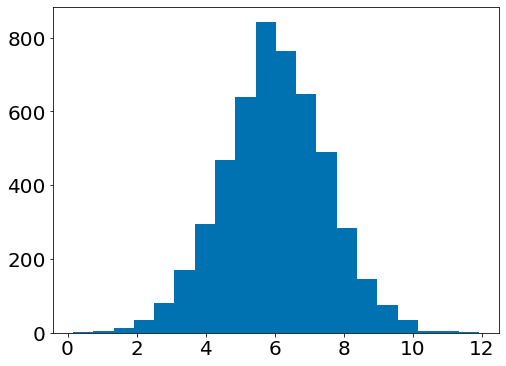

In [335]:
_ = plt.hist(v_diff, bins = 20)

# Hipótese II

In [336]:
clubes = pd.DataFrame(data.groupby(['Club']).mean()['Wage'])
print("Média salarial dos clubes (mil euros):")
clubes.sort_values(by='Wage')

Média salarial dos clubes (mil euros):


,Wage
Club,
Lokomotiv Moscow,1.000000
IF Brommapojkarna,1.000000
Envigado FC,1.000000
Trelleborgs FF,1.000000
FC Carl Zeiss Jena,1.000000
...,...
Manchester United,102.757576
Manchester City,113.363636
Juventus,131.680000


In [337]:
mediaSalarial = clubes['Wage'].mean()
print("Média geral dos clubes: ", mediaSalarial)

Média geral dos clubes:  8.965544035531927


A média dos clubes é 8.96 mil euros, e alguns clubes ganham muito mais, como Real Madrid.
Assim podemos fazer uma hipótese sobre isso. Será que a chance consegue explicar essa diferença entre as médias (hipótese nula) ou não?

Real Madrid:  152.03030303030303
Outros Times:  9.335099337748344
Diferença observada:  142.69520369255468


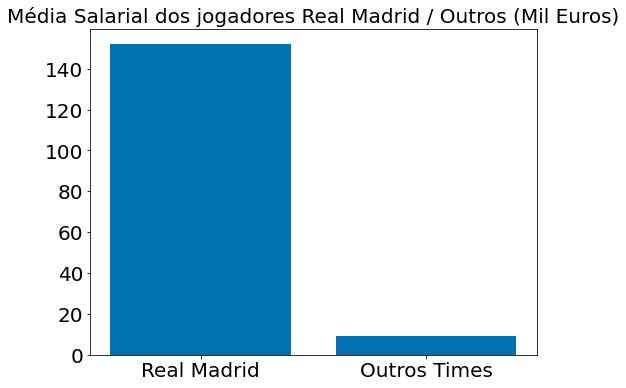

In [338]:
times = data.copy()
t_obs = times[times['Club'] == 'Real Madrid']['Wage'].mean() - times[times['Club'] != 'Real Madrid']['Wage'].mean()
mediaRealMadrid = times[times['Club'] == 'Real Madrid']['Wage'].mean()
mediaOutros = times[times['Club'] != 'Real Madrid']['Wage'].mean()
print("Real Madrid: ", mediaRealMadrid)
print("Outros Times: ", mediaOutros)
print("Diferença observada: ", t_obs)

_ = plt.bar(['Real Madrid', 'Outros Times'], [mediaRealMadrid, mediaOutros])
_ = plt.title("Média Salarial dos jogadores Real Madrid / Outros (Mil Euros)")

Utilizamos o teste de permutação para simular as estatísticas do Real Madrid contra a dos outros times.

In [339]:
#fazemos um teste de permutação

filtro = times['Club'] == 'Real Madrid'
N = 5000
diferencas =  np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = times[filtro]['Wage'].mean() - times[~filtro]['Wage'].mean()
    diferencas[i] = diff

In [340]:
k = 0
for element in diferencas:
    if element > 145:
        k += 1 
p = k / len(diferencas)
print("P-Valor: ",p)
print("Intervalo de confiança (95%): ", np.percentile(diferencas, 2.5), ", ", np.percentile(diferencas, 97.5))

P-Valor:  0.0
Intervalo de confiança (95%):  -5.144146598434679 ,  9.310271422837639


Histograma da distribuição


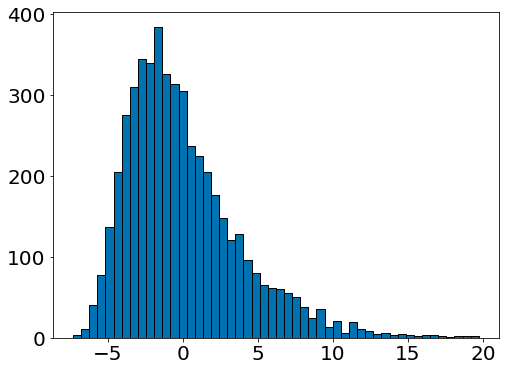

In [341]:
print("Histograma da distribuição")
_ = plt.hist(diferencas,bins=50, edgecolor='k')

O P-Valor encontrado foi muito pequeno, o que nos leva a rejeitar a hipótese nula, e a estatística encontrada é um valor bem extremo. Ou seja,
a diferença salarial entre o Real Madrid e os outros times não pode ser explicada pelo acaso apenas.

# Regressões


Vamos tentar relacionar o salário de um jogador com a sua idade.

In [342]:
cols = ['Age', 'Wage']
series = data[cols].groupby('Age', as_index=False).mean()
series.head()

,Age,Wage
0,16,1.170732
1,17,2.147887
2,18,2.134094
3,19,2.413607
4,20,4.111824


In [343]:
def beta(series, mean_x, mean_y):
    num = 0
    den = 0
    for i in range(len(series)):
        num += (series.iloc[i][0] - mean_x) * (series.iloc[i][1] - mean_y)
        den += (series.iloc[i][0] - mean_x) ** 2
    return num/den

mean_x = np.mean(series['Age'])
mean_y = np.mean(series['Wage'])
beta = beta(series, mean_x, mean_y)
print("Coeficiente beta")
beta

Coeficiente beta


0.07967790390876903

In [344]:
alpha = mean_y - beta*mean_x
print("Coeficiente alpha")
alpha

Coeficiente alpha


5.836746057155837

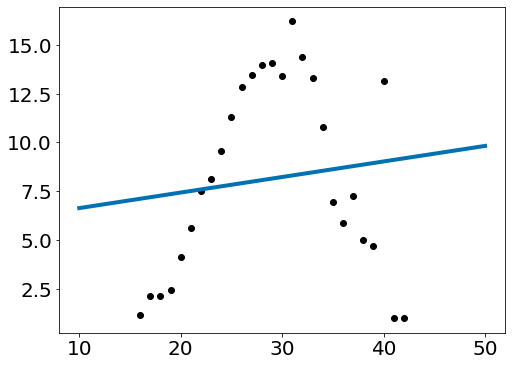

In [345]:
fig,ax = plt.subplots()
x = np.linspace(10.,50.)
ax.plot(x,beta*x+alpha)
x = np.array(series.iloc[:len(series)-1,0].values).reshape((-1,1)) 
y = np.array(series.iloc[:len(series)-1,1].values).reshape((-1,1))
plt.scatter(x,y,color="black")
plt.show()

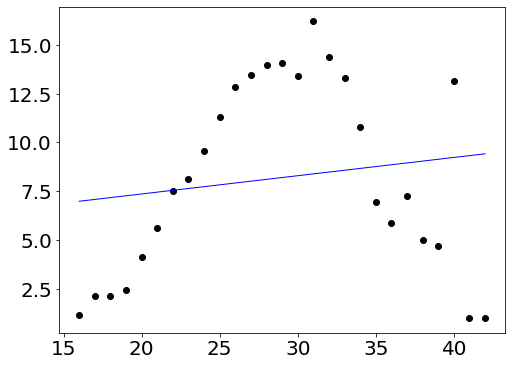

In [346]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = np.array(series.iloc[:len(series)-1,0].values).reshape((-1,1)) 
y = np.array(series.iloc[:len(series)-1,1].values).reshape((-1,1))

model.fit(x,y)
new_y = model.predict(x)
plt.scatter(x,y,color="black")
_ = plt.plot(x,new_y,color="blue", linewidth=1)

In [347]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x)

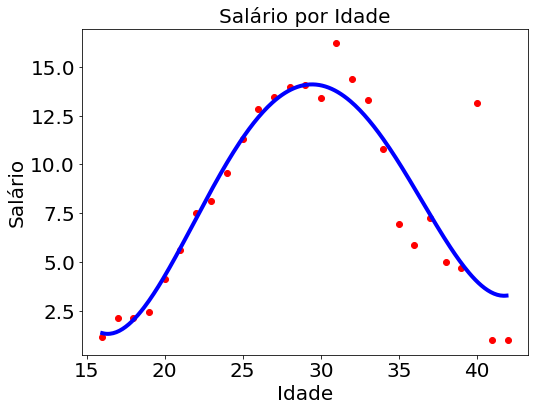

In [348]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
  
X_grid = np.arange(min(x),max(x),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(x,y, color='red') 
  
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
  
plt.title("Salário por Idade")
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()

A regressão polinomial acima tenta explicar a trajetória salarial de um jogador de acordo com a idade dele. Veja que, inicialmente, o jogador começa ganhando pouco, e conforme ele avança na carreira, sua compensação também aumenta, atigindo um pico em torno dos 25-30 anos. Então, o salário passa a diminuir, refletindo o envelhecimento do jogador e a perda de suas habilidades. 

# Outras Regressões

In [349]:
#funções para calcular regressão linear
data.reset_index(drop=True, inplace=True)

def error(alpha, beta, x, y):
    return y - alpha - beta*x

def sum_of_squared_errors(alpha, beta, x, y):
    result = 0
    index = 0
    while index < len(y):
      result += (error(alpha,beta,x[index],y[index]))**2
      index += 1
    result = result

    return result

def total_sum_of_squares(y):
    result = 0
    mean = y.mean()

    for element in y:
      result += (element - mean)**2
    result 

    return result

def r_squared(alpha, beta, x, y):
    SQT = total_sum_of_squares(y)
    SQR = sum_of_squared_errors(alpha,beta,x,y)

    return (SQT - SQR)/SQT

In [350]:
def linear_regression(x,y):
  alpha = 0
  beta = 0
  mean_x = x.mean()
  mean_y = y.mean()

  index = 0
  covariancia = 0
  variancia = 0
  while index < len(y):
    covariancia += (x[index] - mean_x)*(y[index] - mean_y)
    index += 1
  covariancia = covariancia/len(y)
  index = 0
  while index < len(x):
    variancia += (x[index] - mean_x)**2
    index += 1
  variancia = variancia/len(x)
  beta = covariancia/variancia
  alpha = mean_y - beta*mean_x

  return (alpha, beta)

In [351]:
def correlacao(x_name,y_name):
  x = data[x_name]
  y = data[y_name]
  x = x[:10000]
  y = y[:10000]
  (alpha,beta) = linear_regression(x,y)
  print("Alpha , Beta:")
  print((alpha,beta))
  print("Coeficiente de Determinação:")
  print(r_squared(alpha,beta,x,y))
  _ = plt.plot(data[x_name], data[y_name],'o')
  _ = plt.plot(data[x_name], alpha + beta*data[x_name], color='r')

Alpha , Beta:
(-61.04125607195944, 1.184496316769495)
Coeficiente de Determinação:
0.16682014461432468


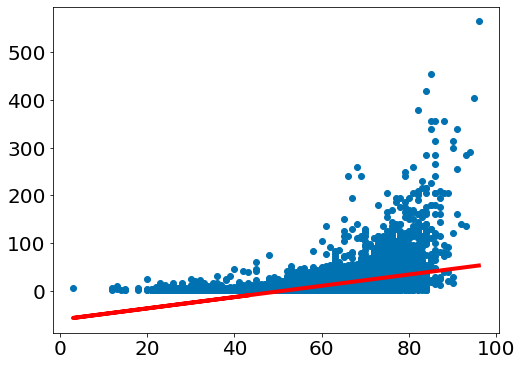

In [352]:
correlacao('Composure','Wage')

Alpha , Beta:
(-17.13935887660564, 0.5525204652616414)
Coeficiente de Determinação:
0.07615544906973405


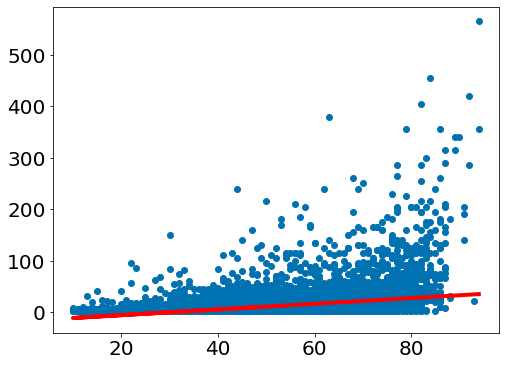

In [353]:
correlacao('Vision','Wage')

Alpha , Beta:
(-131.43457371449963, 2.1914640128239067)
Coeficiente de Determinação:
0.29758713977425627


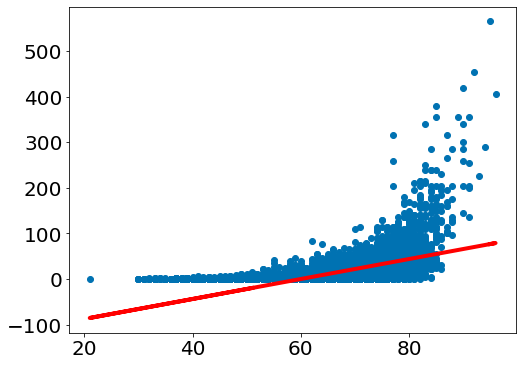

In [354]:
correlacao('Reactions','Wage')

Alpha , Beta:
(-11.248098679826958, 0.4532152602033009)
Coeficiente de Determinação:
0.05588266362716033


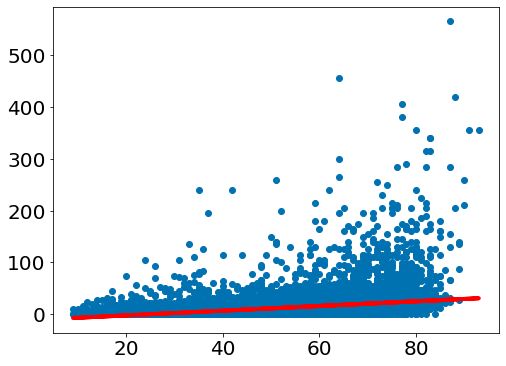

In [355]:
correlacao('LongPassing','Wage')

Alpha , Beta:
(-18.97582206784257, 0.533606167327265)
Coeficiente de Determinação:
0.06877225967400745


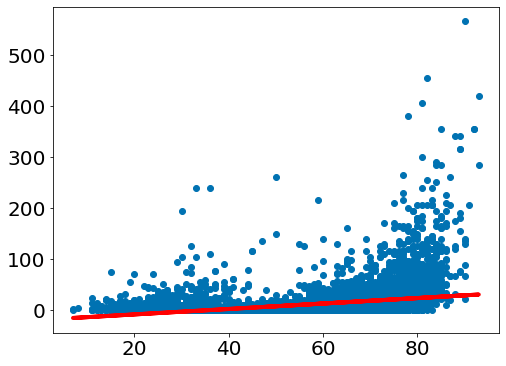

In [356]:
correlacao('ShortPassing', 'Wage')

Parece haver uma relação entre o salário do jogador e os atributos, então iremos utilizá-los no modelo de Machine Learning.

# Previsão



In [357]:
#Pegar as colunas que serão usadas na classificação
features = ['ShortPassing','LongPassing','Reactions','Vision','Composure']
# Número de folds da validação cruzada
SPLITS = 5

X = data[features].values
y = data[['Wage']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [358]:
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=SPLITS, shuffle=True, random_state=1)

In [359]:
print("Modelo - KNN")
contador = 0
jogador = [[90,50,70,80,30]]
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    contador = contador + 1
    print("Fold", contador)
    for i in [5,15, 25,1000]:
      knn = KNeighborsRegressor(n_neighbors=i)
      knn.fit(X_train_fold, y_train_fold)
      y_pred1 = knn.predict(X_test)
      previsao = knn.predict(jogador)
      mean_squared_error = np.mean((y_pred1 - y_test)**2)
      print(i,"Vizinhos | Erro quadrado médio: ", mean_squared_error)
      print("Salario previsto para o jogador:", previsao)
    print("\n")

Modelo - KNN
Fold 1
5 Vizinhos | Erro quadrado médio:  71895.33684589967
Salario previsto para o jogador: [[244.2]]
15 Vizinhos | Erro quadrado médio:  50661.63699742999
Salario previsto para o jogador: [[223.93333333]]
25 Vizinhos | Erro quadrado médio:  38831.946060919196
Salario previsto para o jogador: [[201.]]
1000 Vizinhos | Erro quadrado médio:  1849.2385922979875
Salario previsto para o jogador: [[46.503]]


Fold 2
5 Vizinhos | Erro quadrado médio:  105058.59007509761
Salario previsto para o jogador: [[340.2]]
15 Vizinhos | Erro quadrado médio:  57281.71992924136
Salario previsto para o jogador: [[244.26666667]]
25 Vizinhos | Erro quadrado médio:  39043.7036803845
Salario previsto para o jogador: [[190.64]]
1000 Vizinhos | Erro quadrado médio:  1887.8115930735955
Salario previsto para o jogador: [[46.878]]


Fold 3
5 Vizinhos | Erro quadrado médio:  129123.7491739261
Salario previsto para o jogador: [[366.]]
15 Vizinhos | Erro quadrado médio:  65278.49005306899
Salario previsto

<h3>Conclusão</h3>

Ao utilizar o algoritmo de KNN na nossa base, conseguimos verificar algumas informações tanto sobre os salários dos jogadores quanto os dados.

Podemos ver que a maioria dos jogadores ganha pouco, o que é refletido no KNN. Quando aumentamos a quantidade de vizinhos, o salário de um jogador previsto diminui, devido ao fato de o algoritmo passar a considerar mais vizinhos que, via de regra, reduzem a média.

O erro médio do KNN nos mostra que a previsão usando somente os atributos *ShortPassing, LongPassing, Reactions, Vision, Composure*, não retorna uma previsão útil em relação ao salário do jogador, pois a tabela tem um total de 56 atributos e usando somente 5 não é possivel aproximar um valor correto do salário dos jogadores.